In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt


#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# ML Matrix + Performance params
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Fixing Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.pipeline import Pipeline


#Load the ML Algos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

# Other
import os
from itertools import cycle

In [2]:
#Scaler Function
# example of a normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaler_data(data,scale_used):
    return scale_used.fit_transform(data)

In [3]:
df = pd.read_csv('terraclimate_Sept_Nov_2019.csv').drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,-37.807553,145.263607,0,0,0,97.000000,12.000000,-2.000000,109.0,89.666667,10.666667,140.333333,213.333333,18.666669,8.233335,1.020000,0.613333,5.2
1,-37.991842,145.118825,0,0,1,83.333333,30.000000,-2.499999,113.0,64.000000,3.000000,70.666667,216.000000,18.900002,9.166667,1.076667,0.613333,6.3
2,-37.839039,145.247880,0,0,2,96.666667,14.333333,-2.033333,111.0,84.000000,8.000000,134.666667,213.666667,18.833336,8.533335,1.036667,0.620000,5.4
3,-38.074700,145.501000,0,0,3,96.000000,8.333333,-2.833333,104.0,93.000000,4.666667,220.333333,213.333333,18.266668,8.133334,1.063333,0.540000,5.8
4,-37.778731,145.055068,0,0,4,83.666667,34.333333,-2.600000,118.0,67.666667,3.333333,52.000000,215.666667,19.500003,9.066668,1.046667,0.680000,5.7


In [5]:
print(len(df))
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(len(df))

20008
20008


In [6]:
df.groupby(['cluster','occurrenceStatus']).count()['key']

cluster  occurrenceStatus
0        0                   3299
         1                     84
1        0                   4687
         1                   4761
2        0                    352
         1                    955
3        0                    104
         1                    803
4        0                   4963
Name: key, dtype: int64

In [7]:
df.columns

Index(['decimalLatitude', 'decimalLongitude', 'cluster', 'occurrenceStatus',
       'key', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'soil_mean', 'srad_mean', 'tmax_mean', 'tmin_mean',
       'vap_mean', 'vpd_mean', 'ws_mean'],
      dtype='object')

In [8]:
# # X = df[['cluster', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
# #        'ppt_station_influence_mean', 'q_mean', 'soil_mean', 'srad_mean',
# #        'tmax_mean', 'tmax_station_influence_mean', 'tmin_mean',
# #        'tmin_station_influence_mean', 'vap_mean', 'vap_station_influence_mean',
# #        'vpd_mean', 'ws_mean']]
# # y = df.occurrenceStatus
# # print(y.value_counts())

# X = df[['def_mean','tmin_mean']]
# y = df.occurrenceStatus
# print(y.value_counts())


In [10]:
# # define pipeline
# over = SMOTE(sampling_strategy=0.9)
# under = RandomUnderSampler(sampling_strategy=0.8)
# steps = [('u', under), ('o',over)]
# pipeline = Pipeline(steps=steps)
# # transform the dataset
# X, y = pipeline.fit_resample(X, y)

# temp_df = pd.concat([X,y],axis=1)
# print(y.value_counts())

source  = df.loc[:, df.columns != 'occurrenceStatus']
target = df[['occurrenceStatus']]

# summarize class distribution
print(target.value_counts())
  
# define pipeline
#Oversampling using smote - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
smt = SMOTETomek(sampling_strategy = 'auto')
source_res, target_res = smt.fit_resample(source, target)


# summarize class distribution
print(target_res.value_counts())

occurrenceStatus
0                   13405
1                    6603
dtype: int64
occurrenceStatus
0                   11976
1                   11976
dtype: int64


In [ ]:
# temp_df.groupby(['cluster','occurrenceStatus']).count()['aet_mean']

In [ ]:
# import seaborn as sns

# sns.pairplot(df[['aet_mean','ppt_mean']])

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [12]:
# #Predictor Variables
# X = source_res[['def_mean', 'tmax_mean']]    #Change the same in data_unseen

# #Target
# y = target_res[['occurrenceStatus']]

In [34]:
#Predictor Variables
X = df[['tmin_mean','ppt_mean', 'vap_mean',
       'vpd_mean']]    #Change the same in data_unseen

#Target
y = df[['occurrenceStatus']]

In [35]:
df.columns


Index(['decimalLatitude', 'decimalLongitude', 'cluster', 'occurrenceStatus',
       'key', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'soil_mean', 'srad_mean', 'tmax_mean', 'tmin_mean',
       'vap_mean', 'vpd_mean', 'ws_mean'],
      dtype='object')

In [36]:
Z = df[['ppt_mean', 'vap_mean',
       'vpd_mean']]  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]
vif_data.sort_values(by='VIF')

,feature,VIF
0,ppt_mean,5.475345
2,vpd_mean,45.154532
1,vap_mean,56.116636


In [37]:
# # summarize class distribution
# print(y.value_counts())

# # define pipeline
# #Oversampling using smote - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# smt = SMOTETomek(sampling_strategy = 'auto')
# X_res, y_res = smt.fit_resample(X, y)


# # summarize class distribution
# print(y_res.value_counts())

In [38]:
X_res, y_res = X , y

In [39]:
X_res.describe()

,tmin_mean,ppt_mean,vap_mean,vpd_mean
count,20008.000000,20008.000000,20008.000000,20008.000000
mean,11.887026,52.137345,1.264916,0.850969
std,2.153606,19.731189,0.187031,0.144937
min,3.300001,1.666667,0.803333,0.340000
25%,11.700002,35.000000,1.210000,0.833333
50%,12.000000,57.333333,1.263333,0.856667
75%,12.600001,57.333333,1.263333,0.926667
max,20.100004,158.666667,2.133333,1.573333


In [40]:
# # example of a normalization
# from sklearn.preprocessing import MinMaxScaler
# # define data
# data = X_res
# # define min max scaler
# scaler = MinMaxScaler()
# # transform data
# X_scaled = scaler.fit_transform(data)
# print(X_scaled)

In [41]:
y_res = y_res.astype('category')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.05, random_state=56)


# X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_res,y_res, test_size=0.30, random_state=56)
# X_train = scaler_data(X_train_temp,scaler)
# X_test = scaler_data(X_test_temp,scaler)

In [43]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10) 

In [44]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    print(f"F1 Score: {np.mean(f1_score(y_test, preds)).round(2)}")
    print(f"Accuracy: {np.mean(accuracy_score(y_test, preds)).round(2)}")

In [45]:
#MLP

MLP = MLPClassifier(max_iter=1000)

# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50),(100)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']}

mlp_param_grid = {
    'hidden_layer_sizes': [(6,18,6)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.0005, 0.001],
    'learning_rate': ['constant','adaptive']}

# mlp_param_grid = {
#     'hidden_layer_sizes': [(260,390,260)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.00001,0.01],
#     'learning_rate': ['constant']}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = True)
gsMLP.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.0min finished
C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.0005, 0.001],
                         'hidden_layer_sizes': [(6, 18, 6)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']},
             scoring='accuracy', verbose=True)

Best : 0.7408313076220271, using {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (6, 18, 6), 'learning_rate': 'constant', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       694
           1       0.61      0.33      0.43       307

    accuracy                           0.73      1001
   macro avg       0.68      0.62      0.62      1001
weighted avg       0.71      0.73      0.70      1001

F1 Score: 0.43
Accuracy: 0.73


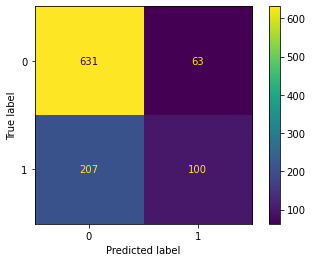

In [46]:
# Summarize the results
MLP_best = gsMLP.best_estimator_
print('Best : {}, using {}'.format(gsMLP.best_score_,gsMLP.best_params_))
report(gsMLP)

In [47]:
gsMLP.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0005, hidden_layer_sizes=(6, 18, 6),
              max_iter=1000)

In [48]:
MLP_best.fit(X,y)

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(activation='tanh', alpha=0.0005, hidden_layer_sizes=(6, 18, 6),
              max_iter=1000)

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       694
           1       0.54      0.86      0.66       307

    accuracy                           0.73      1001
   macro avg       0.73      0.77      0.72      1001
weighted avg       0.80      0.73      0.74      1001

F1 Score: 0.66
Accuracy: 0.73


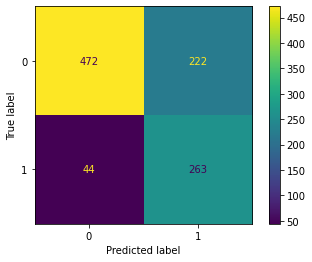

In [49]:
report(MLP_best)

In [50]:
test = pd.read_csv('submission_predictors_terraclimate.csv').drop('Unnamed: 0',axis=1)
test

,id,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,0,-37.917146,145.207706,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
1,1,-37.750974,144.981501,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
2,2,-37.961600,145.348000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
3,3,-37.621300,145.003000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
4,4,-38.498100,145.647000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,4046,-31.884385,116.150192,NaN,50.529167,81.137500,-1.365000,131.612500,68.616667,18.204167,57.683333,231.645833,23.183335,10.612502,1.150875,1.001042,3.826250
4047,4047,-32.412962,115.779737,NaN,51.320833,88.137500,-2.365833,139.433333,60.000000,8.779167,61.729167,232.704167,24.072918,12.800418,1.356417,0.955208,5.162500
4048,4048,-32.147959,115.856628,NaN,50.991667,89.566667,-2.296666,140.491667,59.062500,8.120833,65.654167,233.208333,24.143335,12.958752,1.334000,0.995583,4.850417
4049,4049,-31.827000,116.238000,NaN,46.254167,86.800000,-1.086250,133.054167,60.600000,14.383333,43.779167,231.712500,23.624585,10.504168,1.139250,1.054083,3.619167


In [52]:
data_unseen = test[['tmin_mean','ppt_mean', 'vap_mean',
       'vpd_mean']]     #Use same column names in X

In [53]:
# #transform data
# data_unseen_Scaled = scaler_data(data_unseen,scaler)
# print(data_unseen_Scaled)

In [54]:
def get_result(model,test_Scaled):
    test_result = model.predict(test_Scaled)
    test.occurrenceStatus = test_result
    print(test.occurrenceStatus.value_counts())

In [55]:
data_unseen

,tmin_mean,ppt_mean,vap_mean,vpd_mean
0,9.011668,40.008333,1.065542,1.043167
1,9.011668,40.008333,1.065542,1.043167
2,9.011668,40.008333,1.065542,1.043167
3,9.011668,40.008333,1.065542,1.043167
4,9.011668,40.008333,1.065542,1.043167
...,...,...,...,...
4046,10.612502,68.616667,1.150875,1.001042
4047,12.800418,60.000000,1.356417,0.955208
4048,12.958752,59.062500,1.334000,0.995583
4049,10.504168,60.600000,1.139250,1.054083


In [56]:
X

,tmin_mean,ppt_mean,vap_mean,vpd_mean
0,8.233335,89.666667,1.020000,0.613333
1,9.166667,64.000000,1.076667,0.613333
2,8.533335,84.000000,1.036667,0.620000
3,8.133334,93.000000,1.063333,0.540000
4,9.066668,67.666667,1.046667,0.680000
...,...,...,...,...
20003,12.600001,35.000000,1.260000,0.926667
20004,12.600001,35.000000,1.260000,0.926667
20005,12.699999,33.333333,1.293333,0.890000
20006,12.600001,35.000000,1.260000,0.926667


In [57]:
get_result(gsMLP,data_unseen)


0    2810
1    1241
Name: occurrenceStatus, dtype: int64


In [ ]:
test.iloc[:,:4].to_csv('feature_samp_aet_pdsi_soil_ppt_tmin_vpd_ws_18_54_18.csv')